### 1. Project Initialization
#### 1.1 Import Dependencies
- Load libraries (pandas, numpy, scikit-learn, matplotlib)
- Ensure reproducibility with random seeds
- Import ML modules

#### 1.2 Configuration Setup
- Define global variables, constants
- Set hyperparameters
- Configure visualization settings
- Set up file paths

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt


### 2. Data Management
#### 2.1 Data Loading
- Load dataset from CSV/API/DB
- Handle file formats
- Load into DataFrame

#### 2.2 Data Inspection
- Check shape, data types
- View rows
- Identify missing values

#### 2.3 Data Quality Assessment
- Detect outliers, duplicates
- Validate consistency
- Assess completeness

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:

columns = df.columns.tolist()
print("Columns in the dataset:", columns)

Columns in the dataset: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorc

In [5]:
for col in columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

C:\Users\Dell\AppData\Local\Temp\ipykernel_17180\4229444236.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17180\4229444236.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [6]:
df = pd.get_dummies(df, drop_first=True,dtype=float)

In [7]:
x = df.corr()['SalePrice'].sort_values(ascending=False).drop('SalePrice').to_dict()

In [8]:
x = {key: value for key, value in x.items() if abs(value) > 0.5}
x

{'OverallQual': 0.7909816005838053,
 'GrLivArea': 0.7086244776126515,
 'GarageCars': 0.6404091972583519,
 'GarageArea': 0.6234314389183622,
 'TotalBsmtSF': 0.6135805515591943,
 '1stFlrSF': 0.6058521846919153,
 'FullBath': 0.5606637627484453,
 'TotRmsAbvGrd': 0.5337231555820284,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113866,
 'GarageFinish_Unf': -0.5139062609657621,
 'KitchenQual_TA': -0.519297853654885,
 'ExterQual_TA': -0.5890435234097585}

In [9]:
columns = list(x.keys())
columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageFinish_Unf',
 'KitchenQual_TA',
 'ExterQual_TA']

### 3. Exploratory Data Analysis
#### 3.1 Statistical Summary
- Descriptive statistics
- Correlations
- Distribution analysis
- Skewness identification

#### 3.2 Visualization & Insights
- Scatter, histograms, boxplots
- Identify patterns/trends
- Generate insights

#### 3.3 Feature-Target Relationship
- Analyze correlation
- Identify influential features
- Select relevant features

In [10]:
df = df[columns + ['SalePrice']]

In [11]:
df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageFinish_Unf,KitchenQual_TA,ExterQual_TA,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,0.0,0.0,0.0,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1.0,1.0,181500
2,7,1786,2,608,920,920,2,6,2001,2002,0.0,0.0,0.0,223500
3,7,1717,3,642,756,961,1,7,1915,1970,1.0,0.0,1.0,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,0.0,0.0,0.0,250000


In [12]:
df.describe()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageFinish_Unf,KitchenQual_TA,ExterQual_TA,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1515.463699,1.767123,472.980137,1057.429452,1162.626712,1.565068,6.517808,1971.267808,1984.865753,0.469863,0.503425,0.620548,180921.195890
std,1.382997,525.480383,0.747315,213.804841,438.705324,386.587738,0.550916,1.625393,30.202904,20.645407,0.499262,0.500160,0.485417,79442.502883
min,1.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,34900.000000
25%,5.000000,1129.500000,1.000000,334.500000,795.750000,882.000000,1.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,129975.000000
50%,6.000000,1464.000000,2.000000,480.000000,991.500000,1087.000000,2.000000,6.000000,1973.000000,1994.000000,0.000000,1.000000,1.000000,163000.000000
75%,7.000000,1776.750000,2.000000,576.000000,1298.250000,1391.250000,2.000000,7.000000,2000.000000,2004.000000,1.000000,1.000000,1.000000,214000.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,2010.000000,1.000000,1.000000,1.000000,755000.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OverallQual       1460 non-null   int64  
 1   GrLivArea         1460 non-null   int64  
 2   GarageCars        1460 non-null   int64  
 3   GarageArea        1460 non-null   int64  
 4   TotalBsmtSF       1460 non-null   int64  
 5   1stFlrSF          1460 non-null   int64  
 6   FullBath          1460 non-null   int64  
 7   TotRmsAbvGrd      1460 non-null   int64  
 8   YearBuilt         1460 non-null   int64  
 9   YearRemodAdd      1460 non-null   int64  
 10  GarageFinish_Unf  1460 non-null   float64
 11  KitchenQual_TA    1460 non-null   float64
 12  ExterQual_TA      1460 non-null   float64
 13  SalePrice         1460 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 159.8 KB


### Valuses Distribution

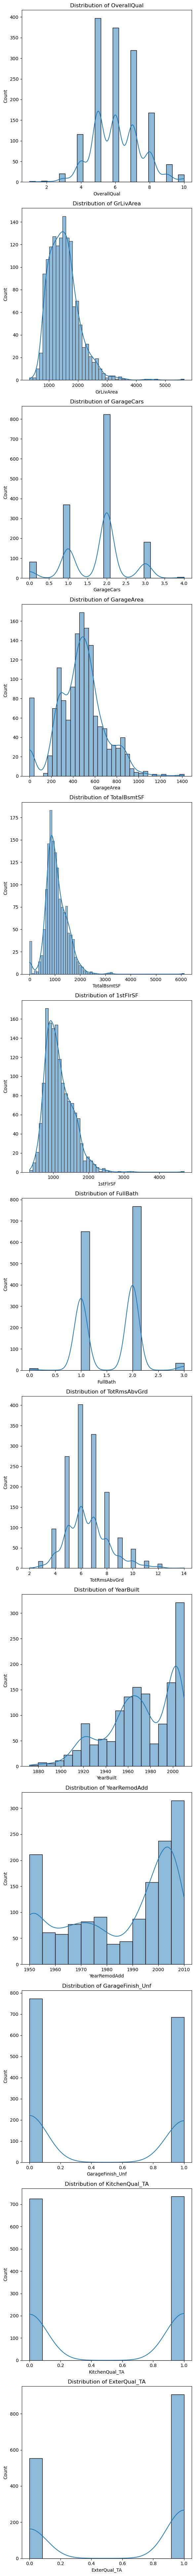

In [14]:
fig, axes = plt.subplots(len(columns), 1, figsize=(6, 6*len(columns)))
for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### Sales Price VS Features 

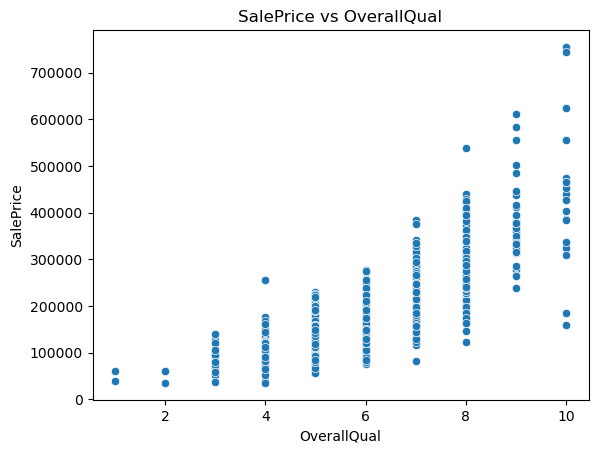

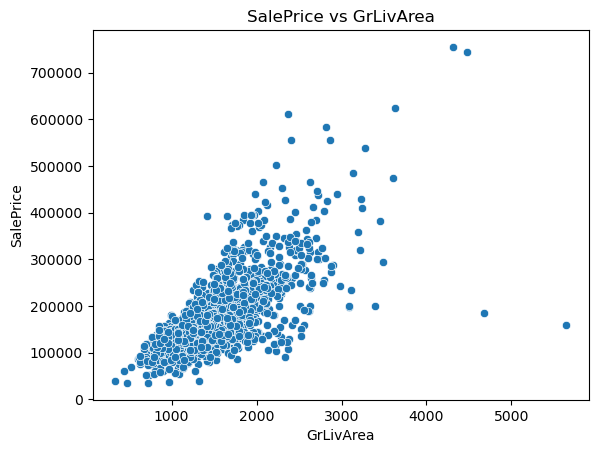

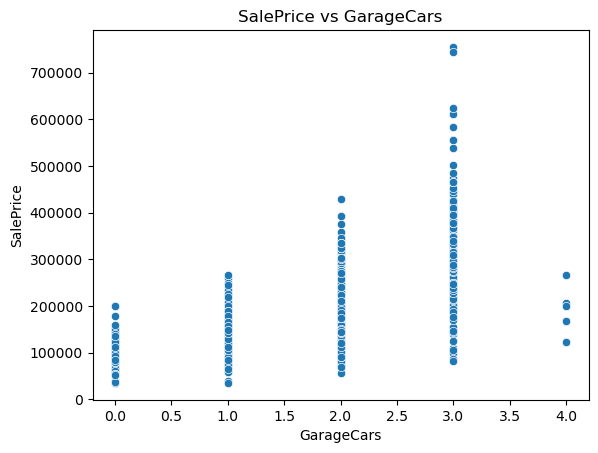

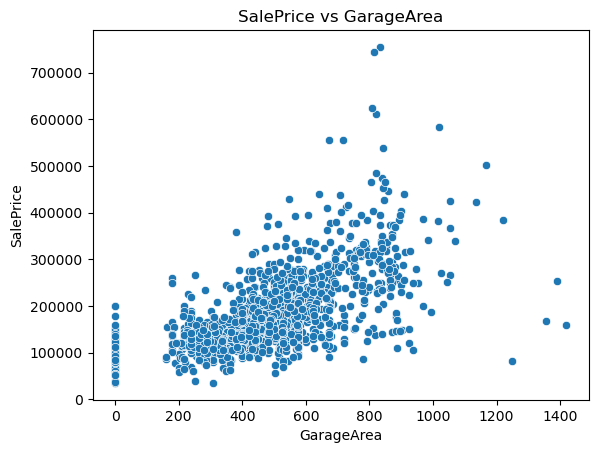

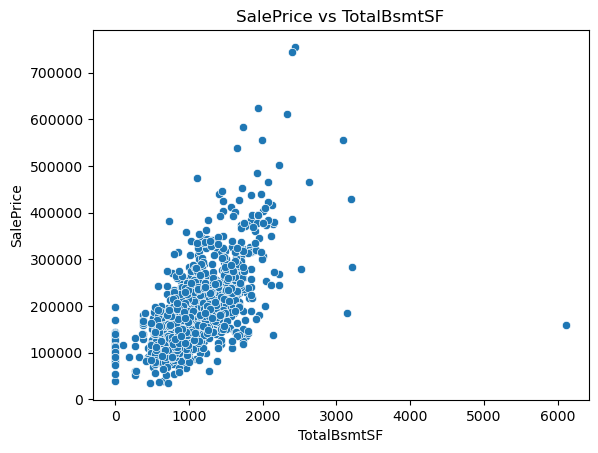

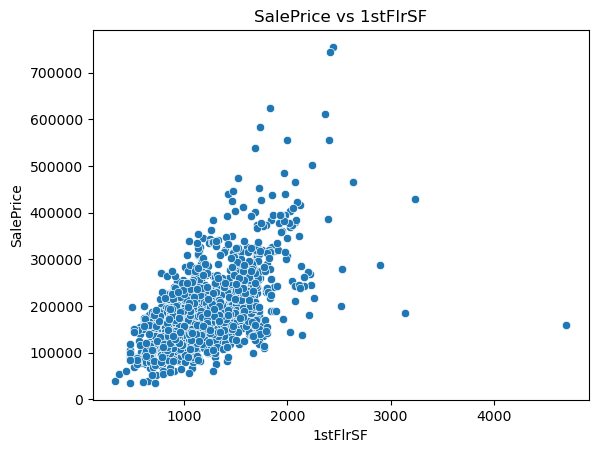

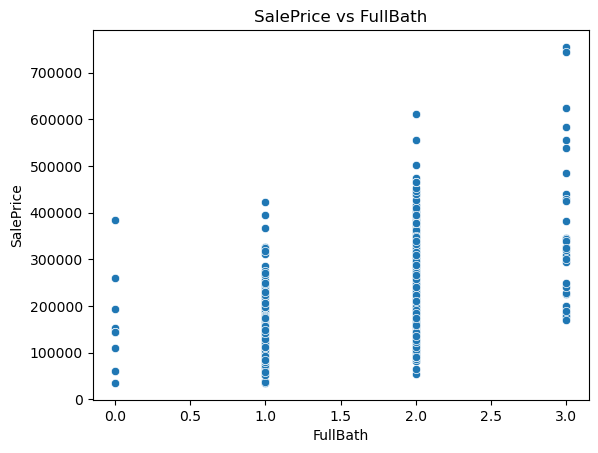

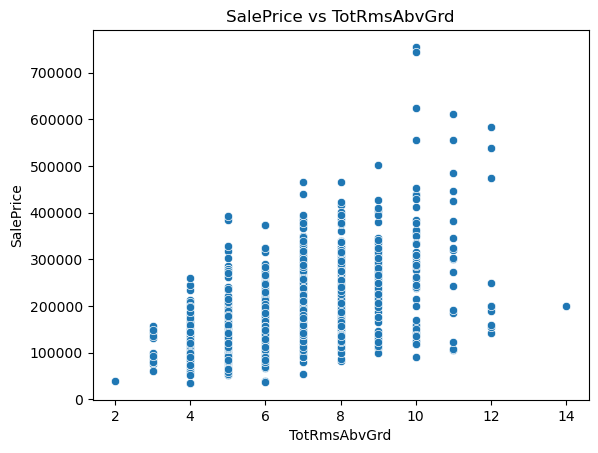

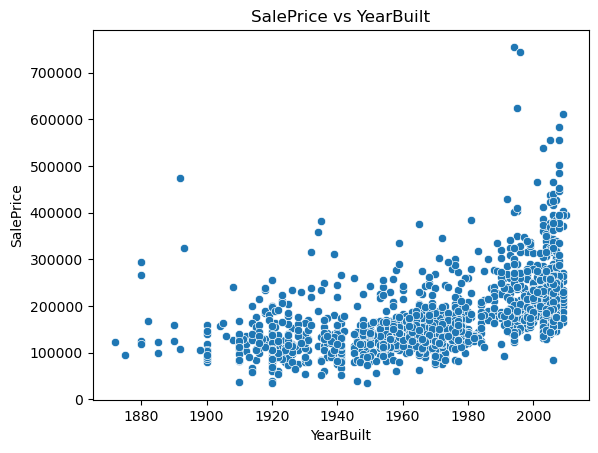

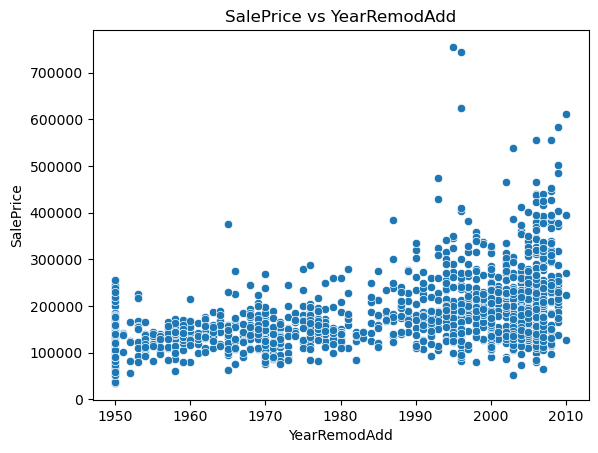

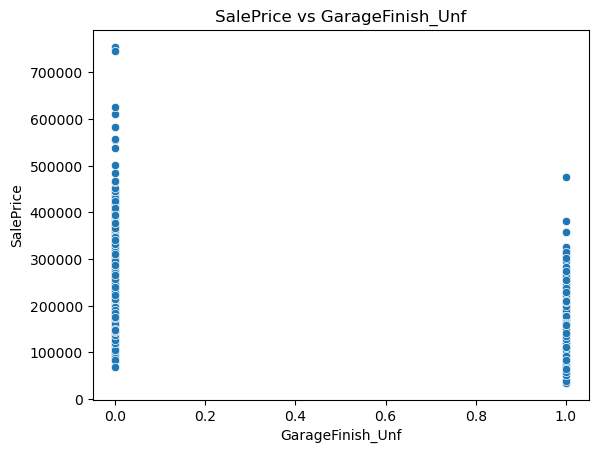

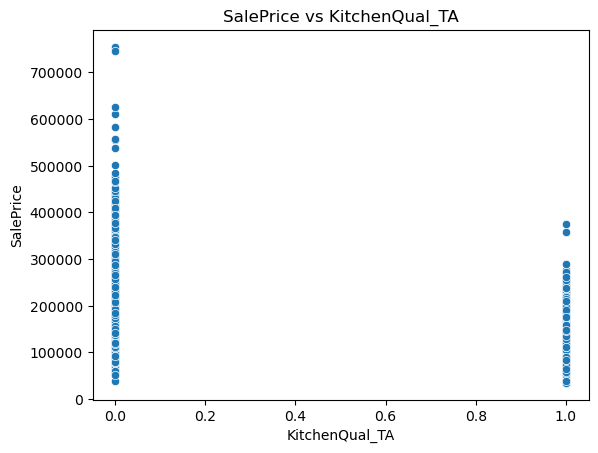

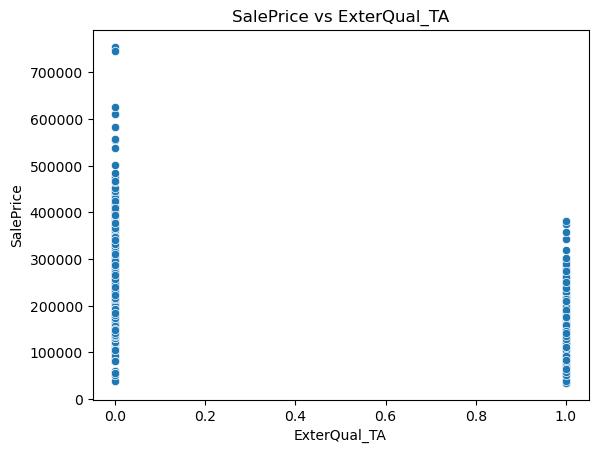

In [15]:
for column in columns:
    sns.scatterplot(data=df, x=column, y='SalePrice')
    plt.title(f'SalePrice vs {column}')
    plt.show()

### Otliets Treatment 

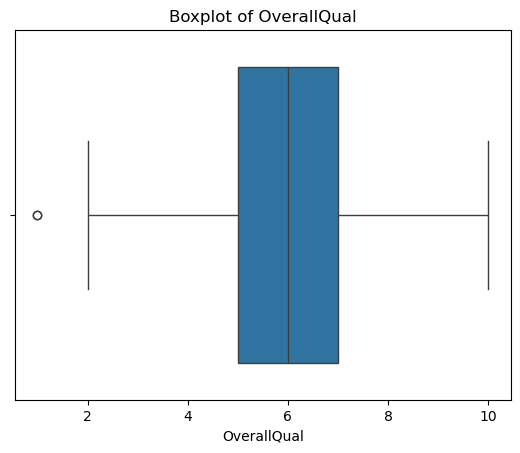

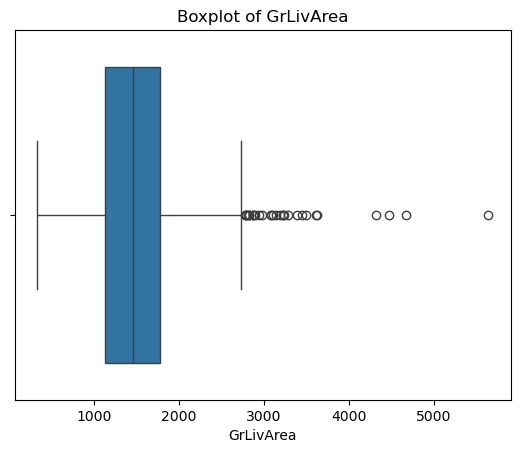

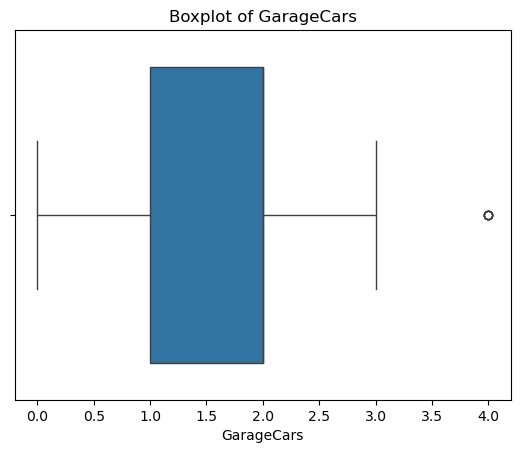

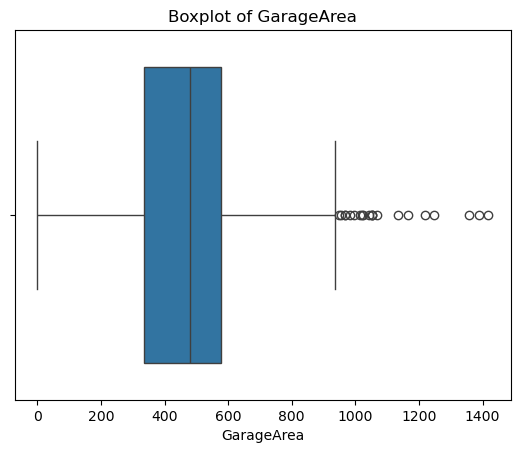

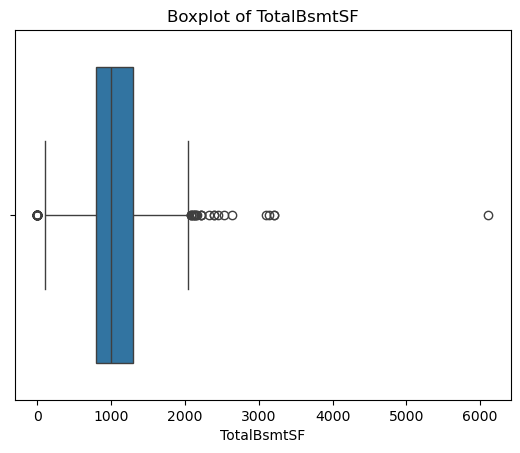

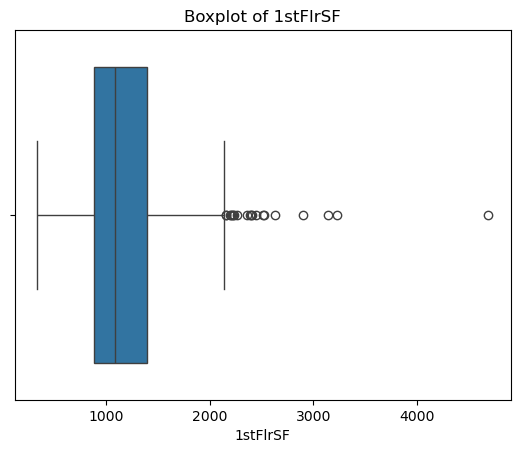

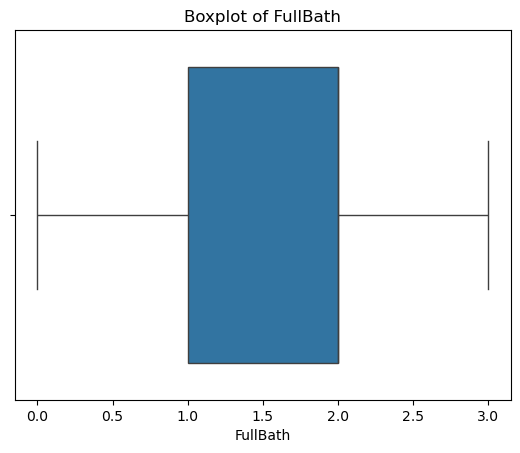

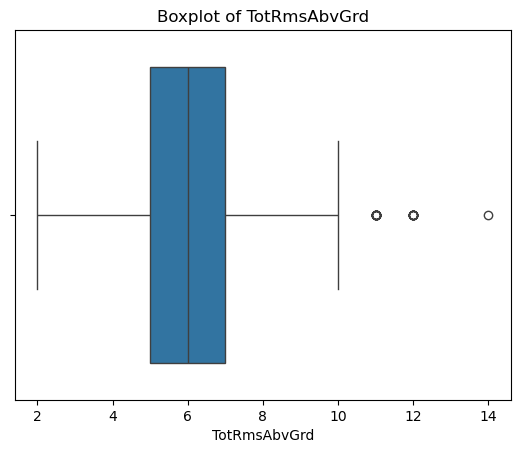

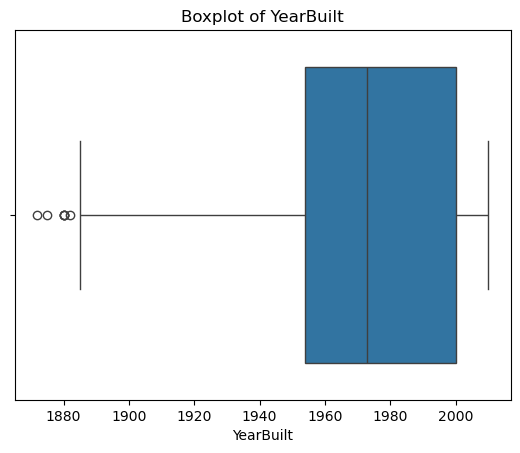

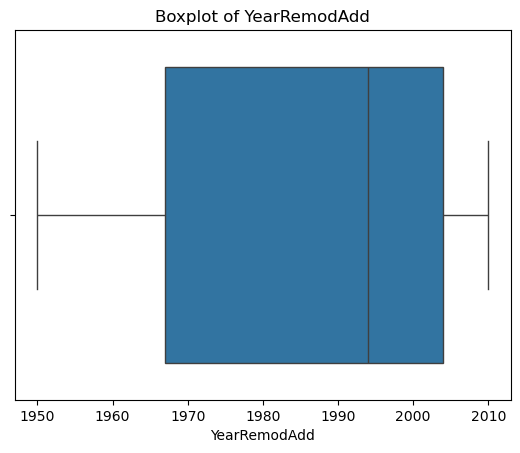

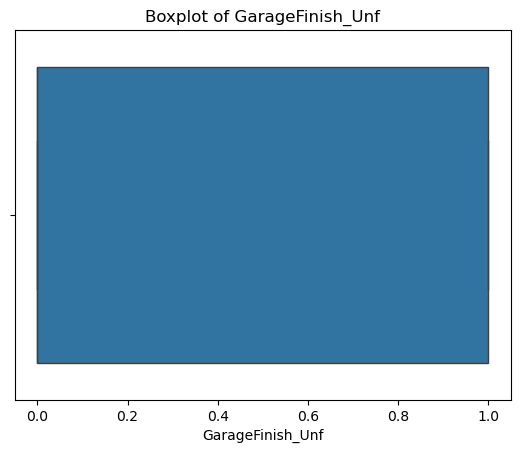

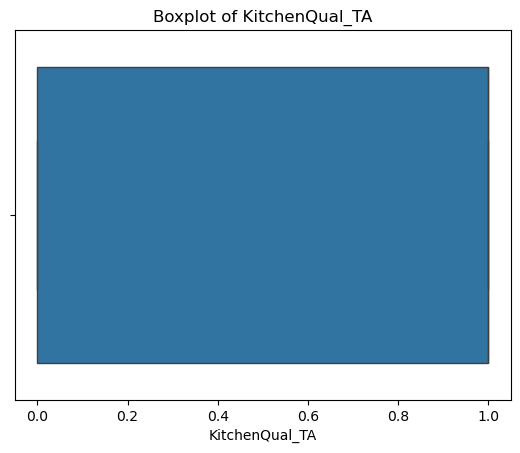

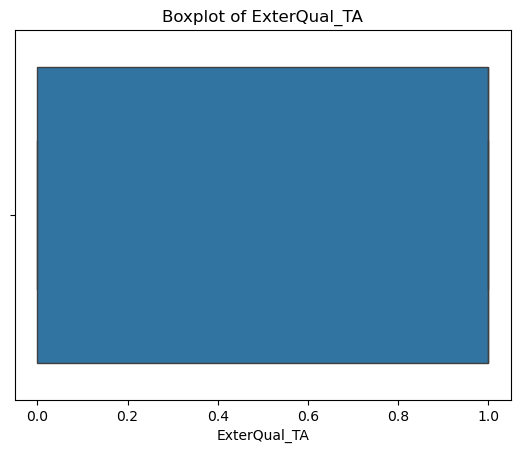

In [16]:
for column in columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

## Handling Outliers

In [17]:
for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

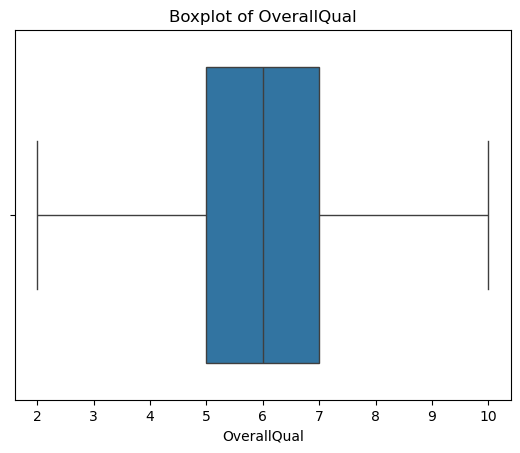

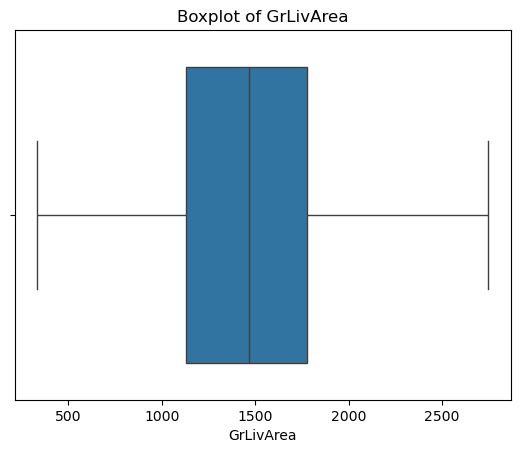

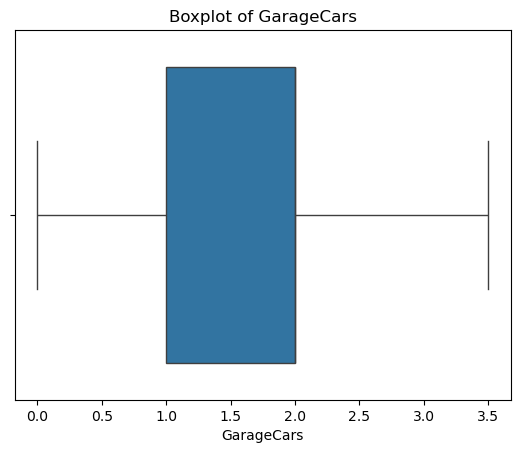

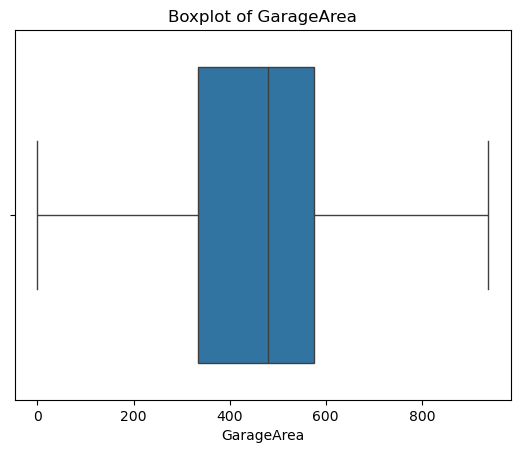

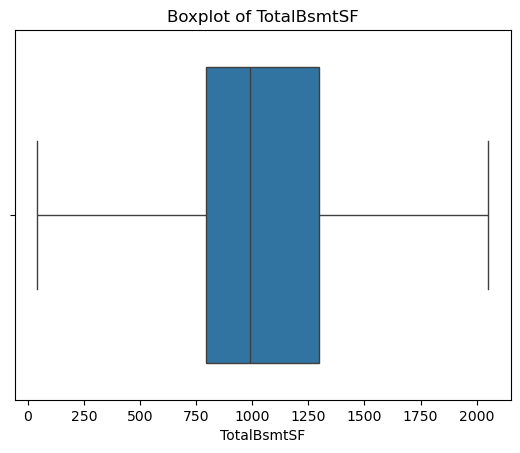

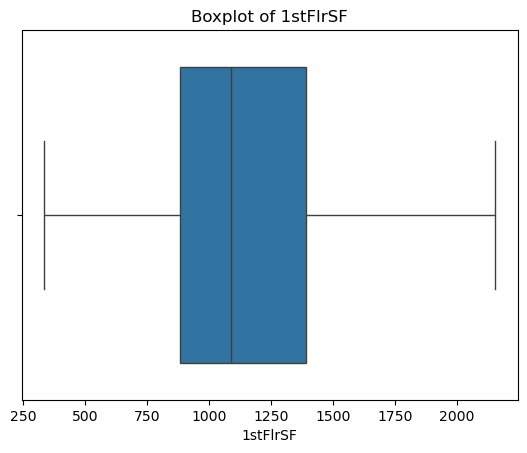

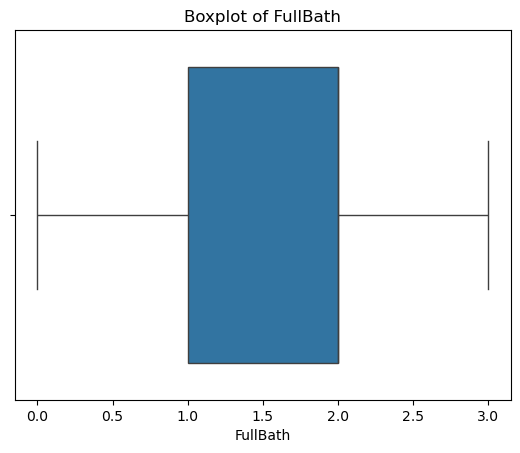

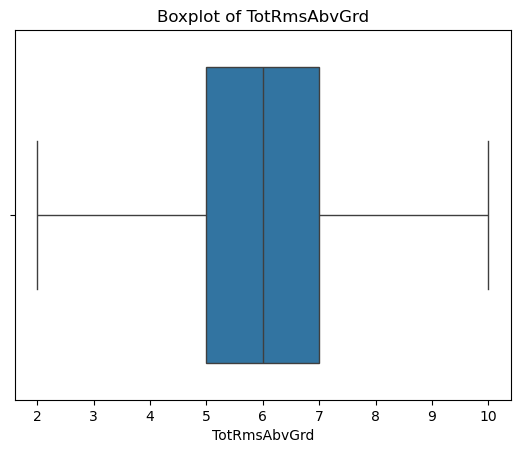

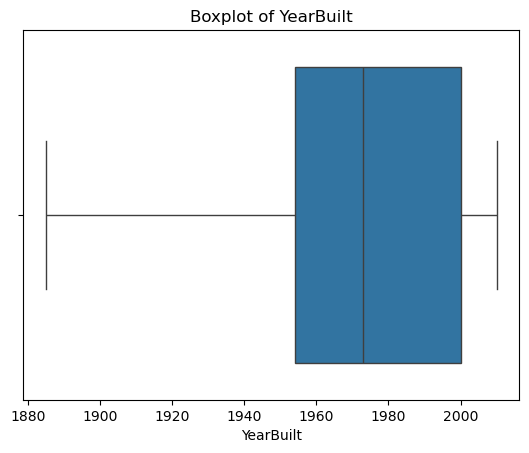

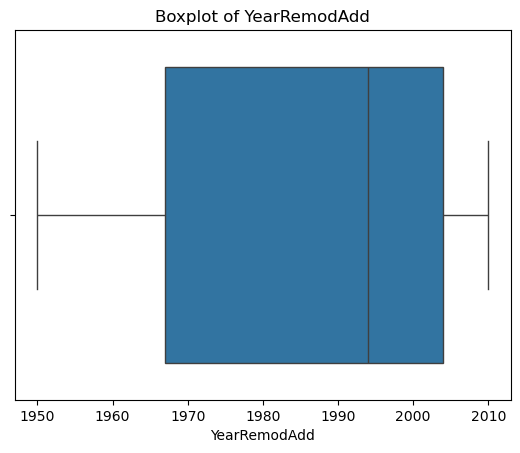

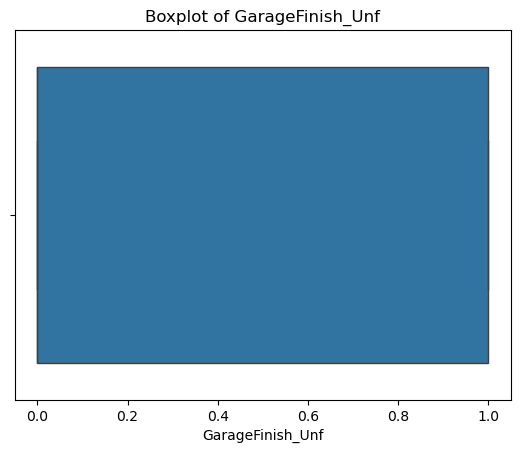

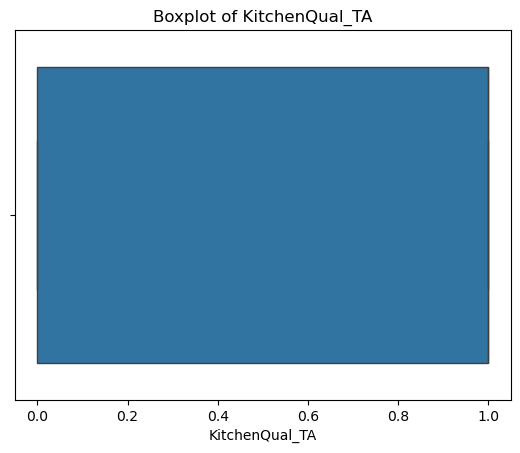

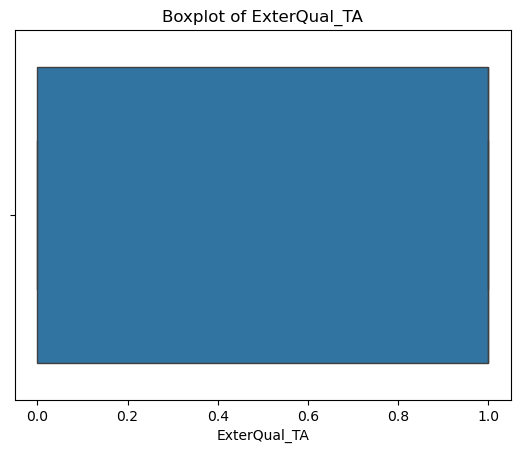

In [18]:
for column in columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_17180\2889441215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.index, y=corr.values, palette='viridis')


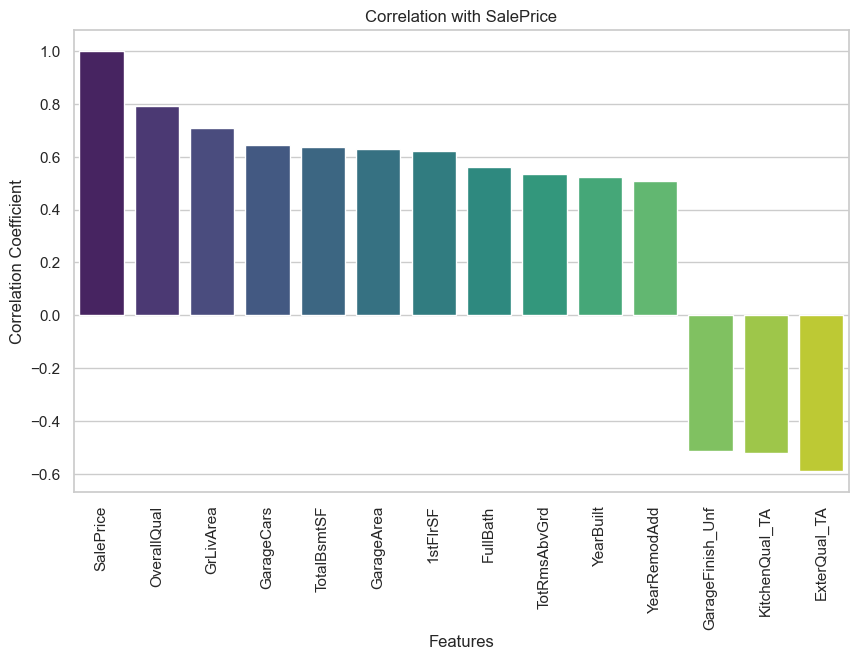

In [19]:
sns.set(style='whitegrid')
corr = df.corr()['SalePrice'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.index, y=corr.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

### 4. Data Preprocessing
#### 4.1 Data Splitting Strategy
- Train-test split
- Cross-validation
- Stratification
- Maintain distribution

#### 4.2 Feature Engineering
- New feature creation
- Encoding categorical variables
- Transform features
- Select important features

#### 4.3 Data Transformation
- Scale/normalize
- Handle missing values
- Transform skewed data
- Prepare for model input

### Splitting the data 

In [20]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1662735026.2031782
R^2 Score: 0.7832249918334387


### 5. Model Implementation
#### 5.1 Model Selection
- Choose algorithm (Linear Regression)
- Compare options
- Consider complexity
- Select best model

#### 5.2 Training Procedure
- Initialize model
- Fit training data
- Monitor training
- Handle optimization

#### 5.3 Model Persistence
- Save model file
- Store preprocessors
- Serialize pipeline
- Enable deployment

In [22]:
model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

    

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


### 6. Inference & Evaluation
#### 6.1 Prediction Pipeline
- Predict on test data
- Preprocess new data
- Handle probabilities
- Build workflow

#### 6.2 Metric Calculation
- Compute MSE, R², MAE
- Train vs test performance
- Reports
- Assess errors

#### 6.3 Performance Benchmarking
- Compare baseline
- Business objectives
- Computational efficiency
- Industry benchmarks

In [23]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 1662733178.0611284
R^2 Score: 0.7832252327804337


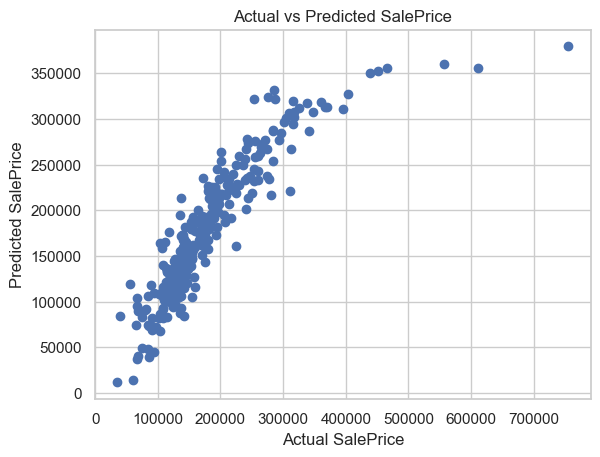

In [24]:
plt.plot(y_test, y_pred, 'o')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

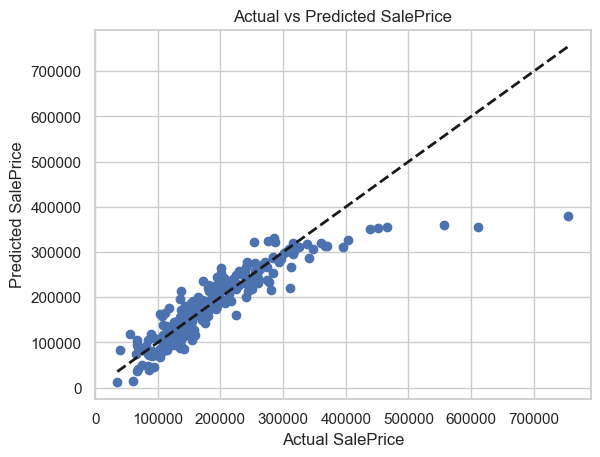

In [25]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()
